In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import random

%matplotlib inline

/home/ubuntu/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [3]:
## Test model
PATH_TO_GRAPH = 'model/freeze_model_small_sim/frozen_inference_graph.pb' ## load SSD trained on udacity's parking lot images
PATH_TO_LABELS = 'data/label_map.pbtxt'
NUM_CLASSES = 4

In [4]:
detection_graph = load_graph(PATH_TO_GRAPH)

In [5]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


### Test Simulator Data

3
SCORES
[ 0.99890327  0.96319991  0.91626287  0.00721938  0.0029256   0.00285886
  0.00218723  0.00186271  0.00180284  0.00177274]
CLASSES
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  3.]


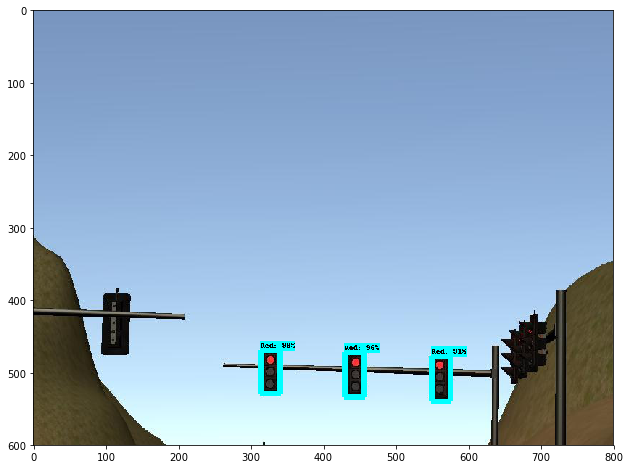

SCORES
[ 0.95848829  0.94750696  0.5937317   0.01424802  0.00907548  0.0060761
  0.00537281  0.00457361  0.00367946  0.00344867]
CLASSES
[ 1.  1.  1.  2.  2.  3.  2.  3.  2.  1.]


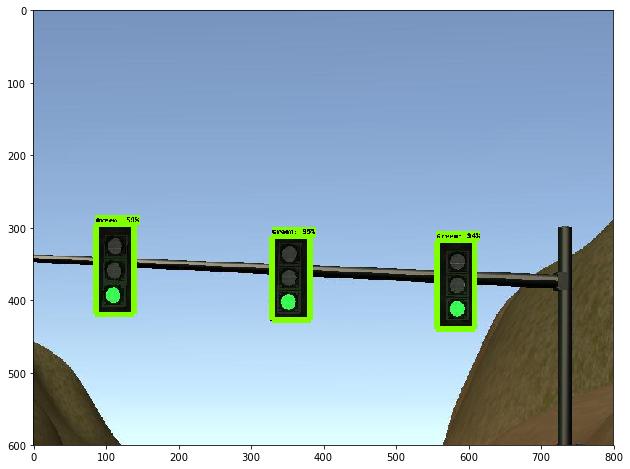

SCORES
[ 0.95848829  0.94750696  0.5937317   0.01424802  0.00907548  0.0060761
  0.00537281  0.00457361  0.00367946  0.00344867]
CLASSES
[ 1.  1.  1.  2.  2.  3.  2.  3.  2.  1.]


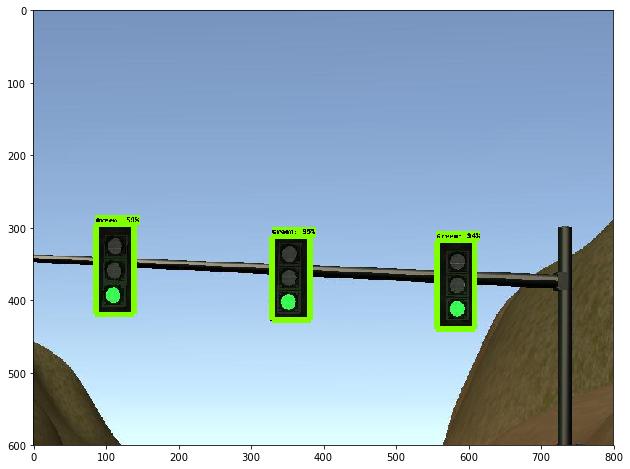

In [13]:
PATH_TO_IMGS = 'data/large/data/sim_training_data/sim_data_capture'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, '*.jpg'))
random.shuffle(TEST_IMGS)

TEST_IMGS = TEST_IMGS[:3]
print(len(TEST_IMGS))

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=(12,8))
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break

### Test Real Image

In [15]:
## Test model
PATH_TO_GRAPH = 'model/freeze_model_large_real/frozen_inference_graph.pb' ## load SSD trained on udacity's parking lot images
PATH_TO_LABELS = 'data/label_map.pbtxt'
NUM_CLASSES = 4

detection_graph = load_graph(PATH_TO_GRAPH)

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


SCORES
[ 0.04474428  0.00775625  0.00760206  0.00515219  0.00470094  0.00400587
  0.00389373  0.00365385  0.00362212  0.00354728]
CLASSES
[ 3.  1.  1.  3.  1.  4.  2.  1.  1.  2.]


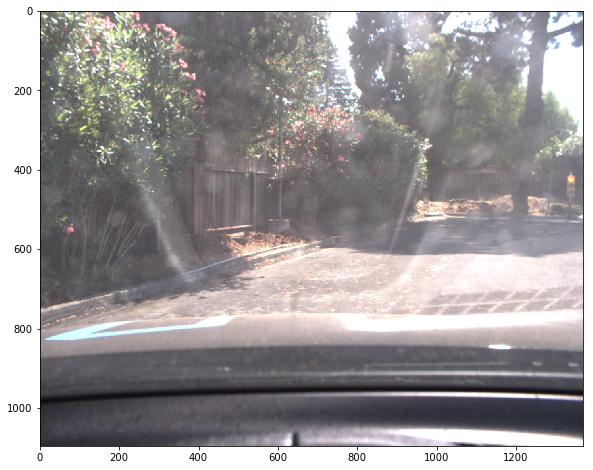

SCORES
[ 0.98864788  0.00472515  0.00459976  0.00442444  0.00387705  0.00375088
  0.00359484  0.00357929  0.003423    0.00336848]
CLASSES
[ 1.  1.  3.  3.  2.  2.  2.  2.  2.  1.]


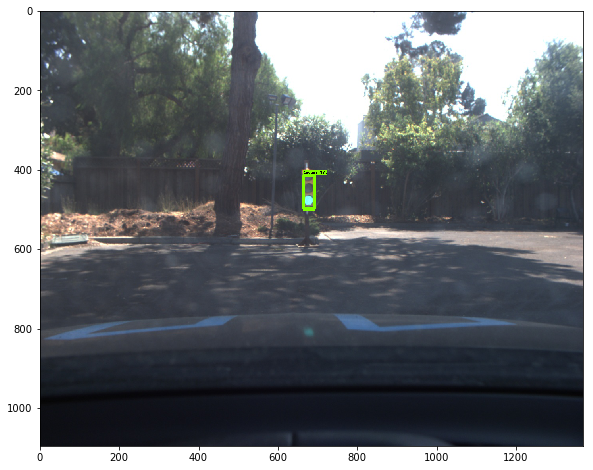

SCORES
[ 0.99533159  0.00697707  0.00512652  0.00478045  0.00473278  0.00427505
  0.00426502  0.00389606  0.00375706  0.00355   ]
CLASSES
[ 1.  2.  1.  3.  3.  1.  2.  2.  2.  3.]


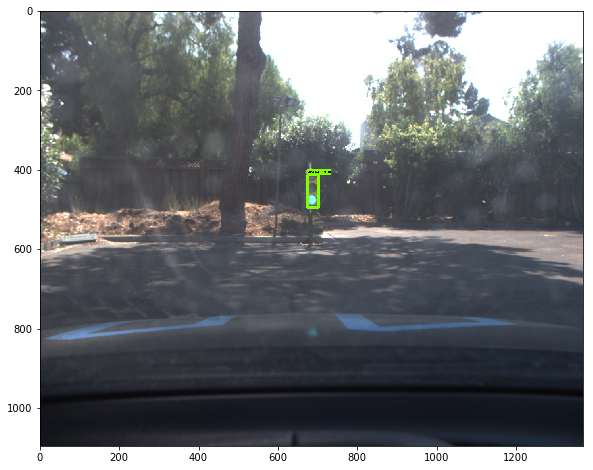

In [18]:
PATH_TO_IMGS = 'data/small/udacity_testarea_rgb'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, '*.jpg'))
random.shuffle(TEST_IMGS)

# pick only 3 items
TEST_IMGS = TEST_IMGS[:3]

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=(12,8))
            plt.imshow(image_np)
            plt.show()            